# 1. Collecting the Data



In [1]:
# import needed libraries

import numpy as np 
import pandas as pd 
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [2]:
#Load the data set
#Show data info and type

data1 = pd.read_csv("train.csv")
data2 = pd.read_csv("test.csv")


#Show data info and type
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
#Show overall statistics of data
#SibSp refers to siblings/spouse
#Parch refers to parent/child
#Pclass refers to social class (1 as highest)

data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#Show first 6 entries of data

data1.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


# 2. Preparing the Data

In [5]:
#Show data with no entries 
#Age,Cabin and Embarked have incomplete entries

data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

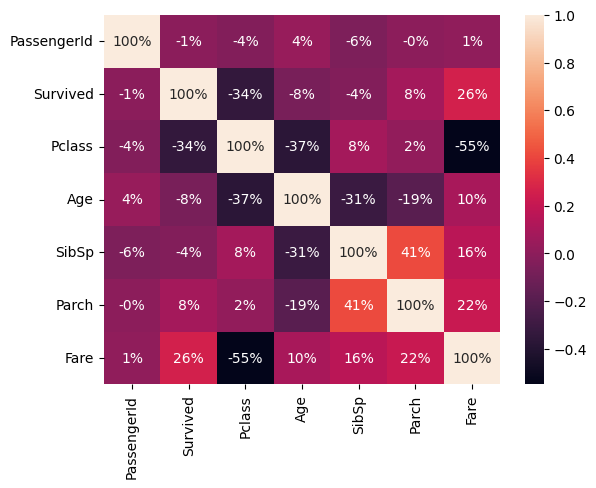

In [6]:
#Show preliminary correlation of feature to target variables
#Fare has highest direct correlation with survivability
#Pclass has highest negative correlation with survivability

sns.heatmap(data1.corr(), annot=True, fmt='.0%')
plt.show()

C:\Users\Ronan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


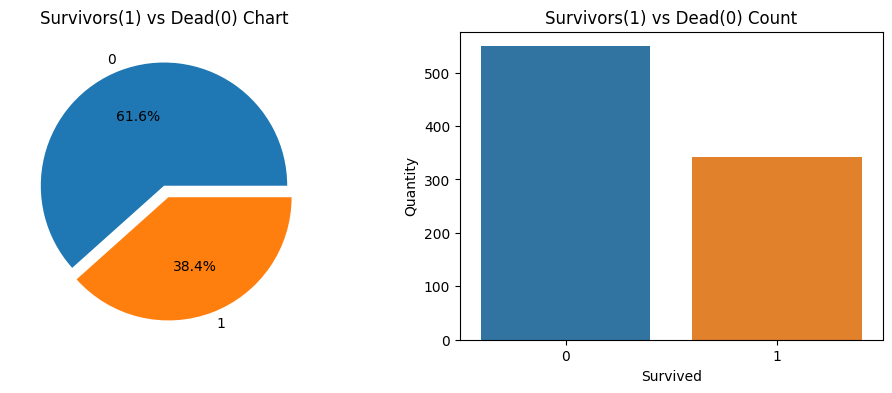

In [7]:
#Determine how many survived and died from the dataset
#Create a piechart for visualization
f, ax = plt.subplots(1, 2, figsize=(12, 4))
data1['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors(1) vs Dead(0) Chart')
ax[0].set_ylabel('')

#Create a graph for visualization
sns.countplot('Survived', data=data1, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors(1) vs Dead(0) Count')
plt.show()

In [8]:
#Total count of each sex in the data
data1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\Ronan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


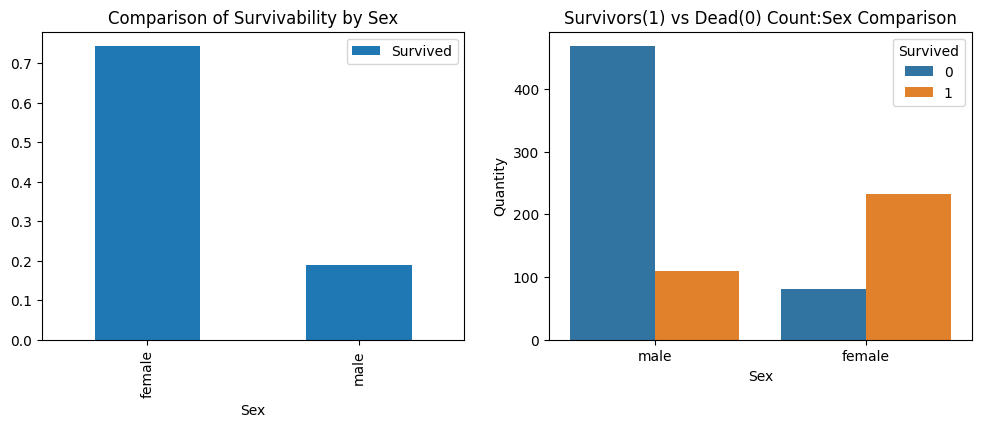

In [9]:
#Determine how many survived and died between each sex
#Create a graph for visualization
f, ax = plt.subplots(1, 2, figsize=(12, 4))
data1[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Comparison of Survivability by Sex')

#Create a graph for visualization
sns.countplot('Sex', hue='Survived', data=data1, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors(1) vs Dead(0) Count:Sex Comparison')
plt.show()

C:\Users\Ronan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


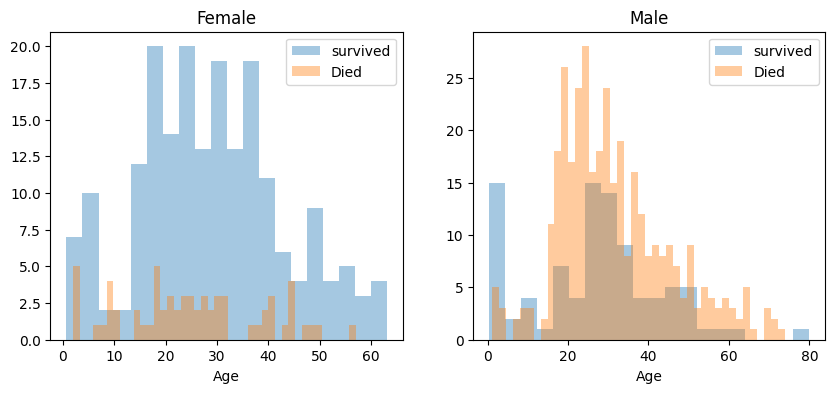

In [10]:
#Define paramters for plot variables
survived = 'survived'
not_survived = 'Died'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
female = data1[data1['Sex']=='female']
male = data1[data1['Sex']=='male']

#Create distribution plot for female
ax = sns.distplot(female[female['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(female[female['Survived']==0].Age.dropna(), bins=42, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

#Create distribution plot for male
ax = sns.distplot(male[male['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']==0].Age.dropna(), bins=42, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

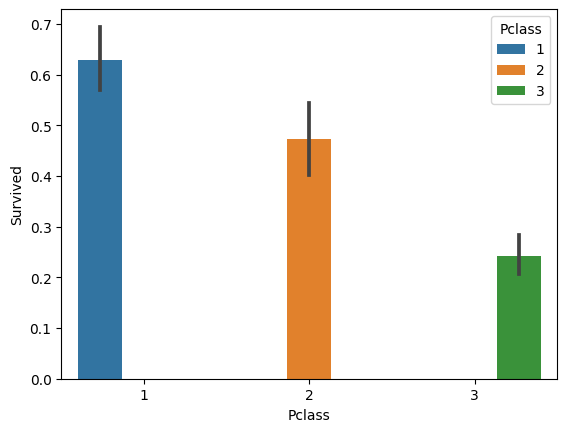

In [11]:
#Create a graph for visualization between social classes
#More people in the higher class (1) survived than lower classes (2&3) 

sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=data1)

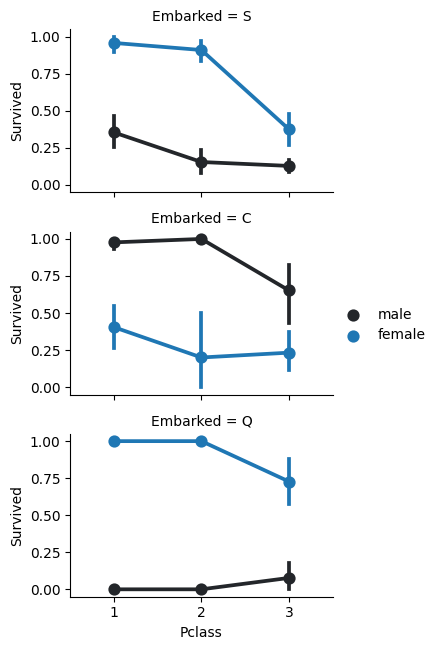

In [12]:
#Visualize distributon between variables
#More chance for women on port Q and S to survive

FacetGrid = sns.FacetGrid(data1, row='Embarked', height=2.2, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [13]:
#Combine data of both testing and training SibSp and ParCh into one
#Assign new variable for combined value

data = [data1, data2]
for dataset in data:
    dataset['fam_friends'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['fam_friends'] > 0, 'with_companion'] = 0        #count and store people with companions
    dataset.loc[dataset['fam_friends'] == 0, 'with_companion'] = 1       #count and store people without companions
    dataset['with_companion'] = dataset['with_companion'].astype(int)    #Save as integer format
    
#Show total count of those with and without companions on the boat

data1['with_companion'].value_counts()

1    537
0    354
Name: with_companion, dtype: int64

C:\Users\Ronan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ronan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


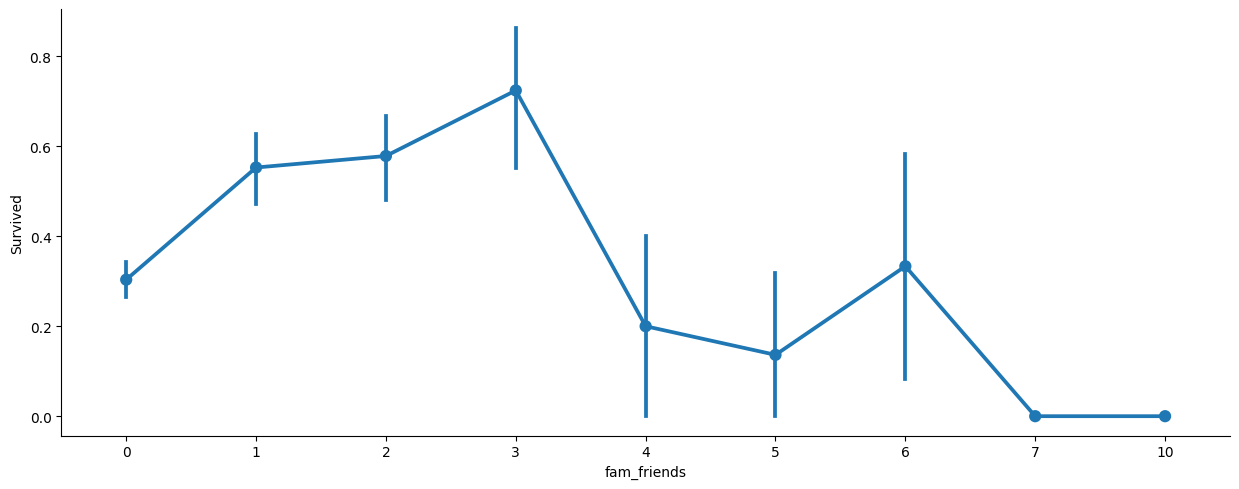

In [14]:
#Show chance of survival when not alone
#People with 1-3 companions have higher rate of surviving
#People with 4 or more companions have lower chances

axes = sns.factorplot('fam_friends','Survived', data=data1, aspect = 2.5, )

In [15]:
#Drop the cabin parameter
data1 = data1.drop(['Cabin'], axis=1)
data2 = data2.drop(['Cabin'], axis=1)

#Drop ticket parameter
data1 = data1.drop(['Ticket'], axis=1)
data2 = data2.drop(['Ticket'], axis=1)

#Drop name parameter
data1 = data1.drop(['Name'], axis=1)
data2 = data2.drop(['Name'], axis=1)

#Drop PassengerId parameter
data1 = data1.drop(['PassengerId'], axis=1)
data2 = data2.drop(['PassengerId'], axis=1)

data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fam_friends,with_companion
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


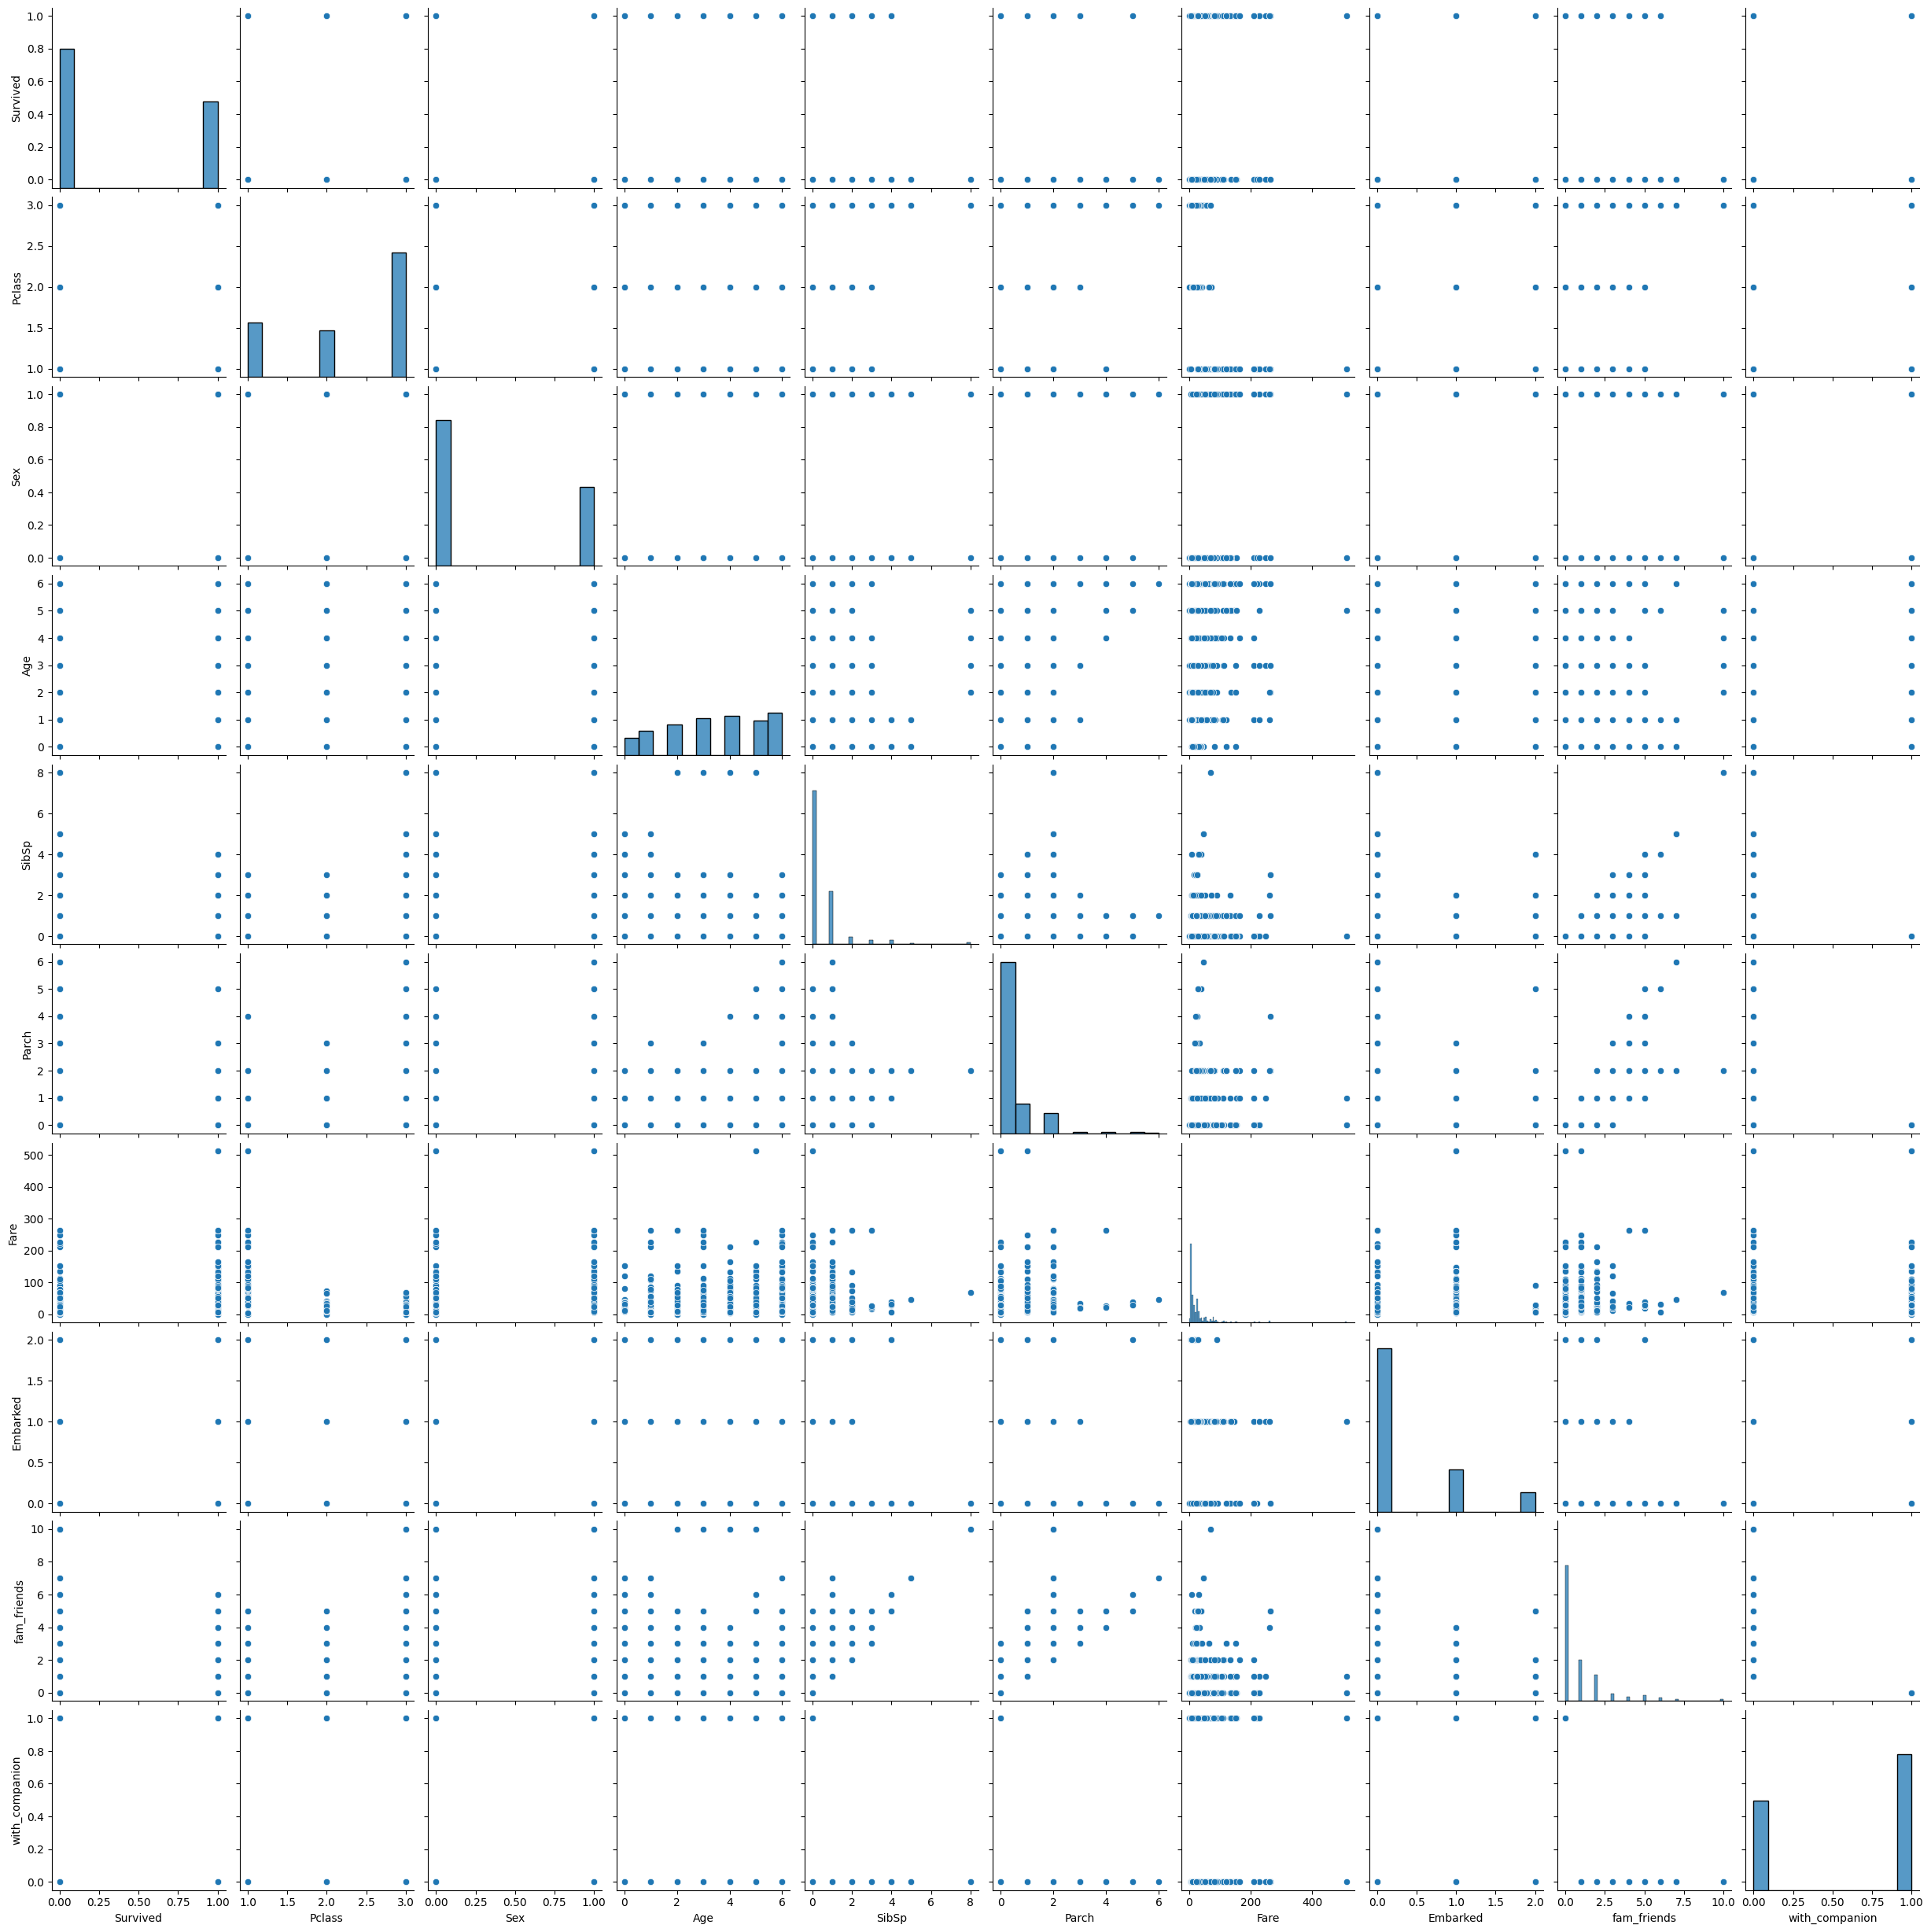

In [73]:
sns.pairplot(data1)

In [16]:
data = [data1, data2]

for dataset in data:
    mean = data1["Age"].mean()
    std = data2["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # get random numbers between the mean and other factors
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # replace NAN values with previously generated values
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    
    dataset["Age"] = age_slice
    dataset["Age"] = data1["Age"].astype(int)
data1["Age"].isnull().sum()

#show common Embarked values
data1['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [17]:
#Fill the 2 missing values with S
common_value = 'S'
data = [data1, data2]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    
#Change value from string to integer    
ports = {"S": 0, "C": 1, "Q": 2}
data = [data1, data2]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    
data = [data1, data2]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)      #Convert from float to integer
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0    #Categorize entry per age bracket 
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1      
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

#Fill missing traning data for fare
#Add mean data to the missing fare entries
common_value = '35.627188'
data = [data2]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(common_value)
    
data1['Age'].value_counts()

6    167
4    156
3    145
5    137
2    122
1     96
0     68
Name: Age, dtype: int64

In [18]:
# change gender to numeric representation

genders = {"male": 0, "female": 1}
data = [data1, data2]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

# 3-4. Choosing ,Training, and Evaluating the Model

In [19]:
# Drop the Survived and PassengerId
# column from the trainset

X = data1.drop(['Survived'], axis=1)
Y = data1["Survived"]
x_train, x_test , y_train, y_test = train_test_split (X,Y,test_size= 0.2, random_state=150)

In [20]:
from sklearn.metrics import accuracy_score
randomforest = RandomForestClassifier()
 
# Fit the training data along with its output
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
 
# Find the accuracy score of the model
acc_randomforest = round(accuracy_score(y_test, y_pred) * 100, 2)
print("The random forest algorithm accuracy is: ", acc_randomforest)

The random forest algorithm accuracy is:  84.92


In [21]:
from sklearn import svm

clf = svm.SVC(kernel='linear')  # Linear Kernel
clf.fit(x_train, y_train)       #Train the model using the training sets
y_pred = clf.predict(x_test)    #Predict the response for test dataset

from sklearn import metrics
score = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
print("The Accuracy for Support Vector Machine is:",score)

The Accuracy for Support Vector Machine is: 81.01


In [22]:
from sklearn.naive_bayes import GaussianNB
 
#Calling the model
nb = GaussianNB()
nb.fit(x_train , y_train)         #Fitting the data to the classifier
y_pred = nb.predict(x_test)       #Predict on test data

from sklearn import metrics
scoreNB = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
print("The Accuracy for Naive Bayes is:",scoreNB)

The Accuracy for Naive Bayes is: 84.92


In [23]:
# Specify which column as feature and target  matrices 

X = data1.iloc[:,1:9]
Y = data1.iloc[:,0]

In [24]:
import tensorflow 
from sklearn.model_selection import train_test_split

from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu')) #prepare models for neural network 
model.add(Dense(8, activation='relu'))                    #the hidden layer
model.add(Dense(1, activation='sigmoid'))                 #theoutput layer (1 output for classification in this case)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
90/90 [==============================] - 0s 652us/step - loss: 1.6531 - accuracy: 0.5006
Epoch 2/150
90/90 [==============================] - 0s 664us/step - loss: 0.6804 - accuracy: 0.6554
Epoch 3/150
90/90 [==============================] - 0s 652us/step - loss: 0.6350 - accuracy: 0.6880
Epoch 4/150
90/90 [==============================] - 0s 652us/step - loss: 0.6109 - accuracy: 0.6936
Epoch 5/150
90/90 [==============================] - 0s 686us/step - loss: 0.5855 - accuracy: 0.7082
Epoch 6/150
90/90 [==============================] - 0s 641us/step - loss: 0.5629 - accuracy: 0.7351
Epoch 7/150
90/90 [==============================] - 0s 664us/step - loss: 0.5515 - accuracy: 0.7340
Epoch 8/150
90/90 [==============================] - 0s 709us/step - loss: 0.5398 - accuracy: 0.7374
Epoch 9/150
90/90 [==============================] - 0s 664us/step - loss: 0.5203 - accuracy: 0.7632
Epoch 10/150
90/90 [==============================] - 0s 664us/step - loss: 0.5108 - accura

In [25]:
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

28/28 [==============================] - 0s 593us/step - loss: 0.4266 - accuracy: 0.8159
Accuracy: 81.59


# 6. Hyperparameter Tuning

In [74]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(randomforest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Fare,0.327
Sex,0.274
Age,0.154
Pclass,0.079
fam_friends,0.050
Embarked,0.042
SibSp,0.034
Parch,0.027
with_companion,0.013


In [26]:
#Hyperparameter tuning for Random Forest

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [27]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [28]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 6, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 120, bootstrap=False) 
randmf.fit( x_train, y_train) 

y_pred_rf1 = pd.DataFrame( { "actual": y_test, 
"predicted_prob": randmf.predict( 
( x_test ) ) } ) 
y_pred_rf1

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}  



,actual,predicted_prob
633,0,0.050680
489,1,0.805614
765,1,0.966364
479,1,0.790611
285,0,0.231840
...,...,...
734,0,0.026996
313,0,0.128360
362,0,0.451194
176,0,0.030552


In [29]:
forestval = (randmf.predict(x_test)>0.5).astype('int32').tolist()
print("The new Random Forest Accuracy is:",accuracy_score(forestval, y_test))

The new Random Forest Accuracy is: 0.8659217877094972


In [30]:
#Tune parameters of SVM through GridSearch

from sklearn.model_selection import GridSearchCV

svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
grid=GridSearchCV(clf, svc_param_grid, refit = True, verbose=1)

grid.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             verbose=1)

In [50]:
#Accuracy was also able to increase due to tuned parameters

svmclf = svm.SVC(C =100, gamma = 0.001, kernel='rbf') # Linear Kernel
#Train the model using the training sets
svmclf.fit(x_train, y_train)
#Predict the response for test dataset
svm_pred = svmclf.predict(x_test)
print("The new SVM Accuracy is:",metrics.accuracy_score(y_test, svm_pred))

The new SVM Accuracy is: 0.8603351955307262


In [70]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(x_train, y_train)
print(nbModel_grid.best_estimator_)
GaussianNB(priors=None, var_smoothing=1.0)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=5.336699231206313e-06)


GaussianNB(var_smoothing=1.0)

In [72]:
#Through careful research, Naive Bayes was found to be already optimized
#There are only few parameters to be tuned resulting in same accuracy 

y_pred = nbModel_grid.predict(x_test)
NBval = (nbModel_grid.predict(x_test))
print("The Naive Bayes Accuracy is:",accuracy_score(NBval, y_test))

The Naive Bayes Accuracy is: 0.8491620111731844


### The 3 algorithms chosen would be the Random Forest, Support Vector Machine, and the Simple Neural Network made through Tensorflow Keras

# 7. Making predictions (w/ output csv)

In [34]:
#Predict data through random forest through test data
RF_pred = randomforest.predict(data2)
prediction = pd.DataFrame(RF_pred, columns=['Survived']).to_csv('randomforest.csv')

#Predict data through SVM through test data
SVM_pred = clf.predict(data2)
prediction = pd.DataFrame(SVM_pred, columns=['Survived']).to_csv('SVM.csv')

#Predict data through Naive Bayes through test data
NB_pred = nb.predict(data2)
prediction = pd.DataFrame(NB_pred, columns=['Survived']).to_csv('NB.csv')


In [35]:
RF_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,

In [36]:
SVM_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [37]:
NB_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

## 7.1. Comparison, Analysis, and Conclusion

### Algorithm Comparison
After comparing the modelled algorithms, it was found that Random Forest and Support Vector Machine had the best accuracies with 86.59% and 86.03% respectively. The simple neural network made with Tensorflow Keras had an accuracy of 81.59%. It was found out through hyperparameter tuning that the accuracy of the algorithms could be improved through tuning of the parameters as well as determining the possible correlation each one has with the other. 



### Analysis of the Data
Based from the algorithm made, it can be seen that the correlation between surviving and the fare you paid for when boarding the ship made for a greater chance of you surviving. After determining the importance values from the random forest model, it can be seen how each parameter is correlated with one another. Based on the visualized data, people of the higher class (1) were the top survivors which further justifies the fare parameter being one of the top factors for survival. It can also be inferred that they would be the first ones to escape the ship as they are VIPs and are a priority of the ship crew especially during emergencies. Suprisingly, the amount of people you are together with during the trip does not affect your chance of survival that much as seen from the results. Furthermore, more females were also able to live when they are boarding through port Q and S which is another correlation seen through the visualization of data. 

The dataset was also found to be interpreted through the manipulation of correlated data into common variables in order to make the model more efficient in determining patterns. One example was done through the combination of the two variables in which people who were together with others and those that are alone through categorization. This process made the parameters less cluttered as well as help in fitting of data. 

### Conclusion
Being able to live during unexpected disasters may always be attributed to luck, however there are often invisible variables that the human mind cannot immediately get a grasp of. Through machine learning and deep neural networks, computers are able to see and recognize patterns in how one might be able to survive in situations similar to the sinking of the Titanic. As seen through the models made, the fare paid as well as the social class of the person plays a role in his chance of escaping the sinking of the ship. Being a priority and a VIP is one sure way to be able to increase the chance of which you are able to live through unexpected disasters along your trip.  